In [4]:
import pandas as pd
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import pgeocode
import us
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
import lightgbm as lgb
import catboost as cb
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
# Suprimir futuros avisos relacionados con el parámetro 'sparse' en OneHotEncoder
warnings.filterwarnings("ignore")


In [5]:
# Ruta del archivo ZIP
zip_file_path = "Churn.zip"
csv_filename = "Telco_customer_churn_status.csv"  # Nombre del archivo CSV dentro del ZIP

# Leer el archivo CSV directamente desde el archivo ZIP
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    with zip_ref.open(csv_filename) as file:
        df = pd.read_csv(file)

# Mostrar las primeras filas para verificar que se ha leído correctamente
df.head()


,Customer ID,Count,Quarter,Customer Status,Churn Label,Churn Value,Churn Category,Churn Reason
0,8779-QRDMV,1,Q3,Churned,Yes,1,Competitor,Competitor offered more data
1,7495-OOKFY,1,Q3,Churned,Yes,1,Competitor,Competitor made better offer
2,1658-BYGOY,1,Q3,Churned,Yes,1,Competitor,Competitor made better offer
3,4598-XLKNJ,1,Q3,Churned,Yes,1,Dissatisfaction,Limited range of services
4,4846-WHAFZ,1,Q3,Churned,Yes,1,Price,Extra data charges


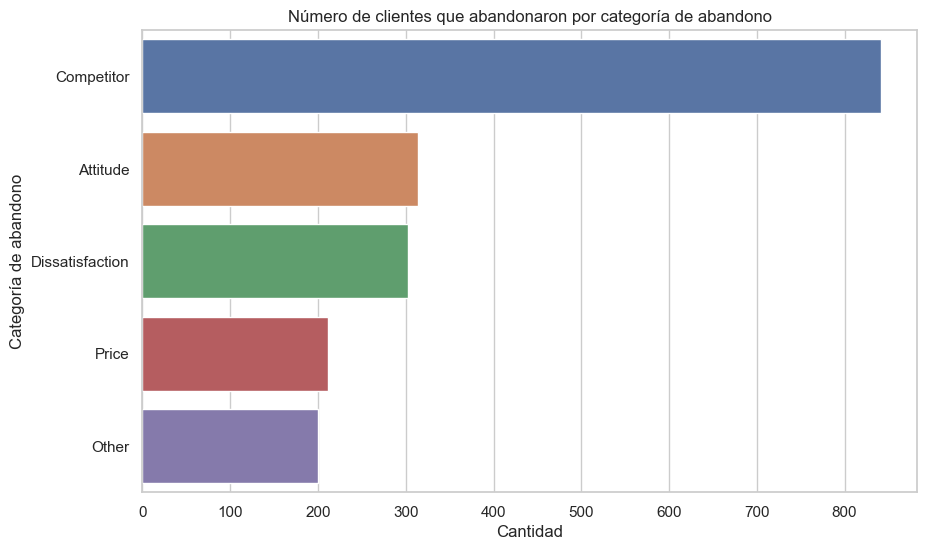

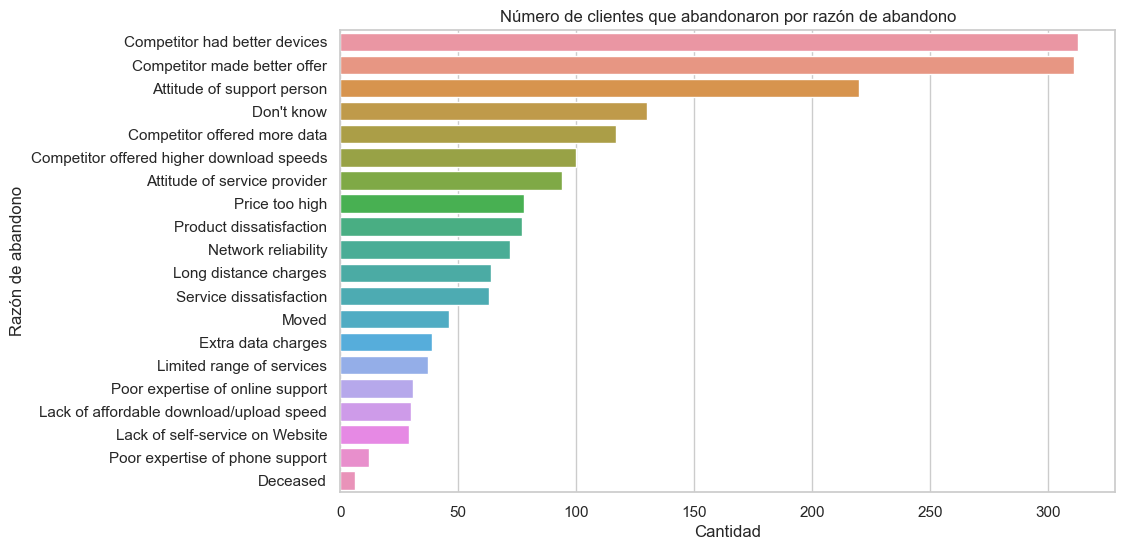

In [6]:
# Filtrar los datos donde el valor de 'Churn Value' sea 1
df_churned = df[df['Churn Value'] == 1]

# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Crear la gráfica de barras para 'Churn Category'
plt.figure(figsize=(10, 6))
sns.countplot(data=df_churned, y='Churn Category', order=df_churned['Churn Category'].value_counts().index)
plt.title('Número de clientes que abandonaron por categoría de abandono')
plt.xlabel('Cantidad')
plt.ylabel('Categoría de abandono')
plt.show()

# Crear la gráfica de barras para 'Churn Reason'
plt.figure(figsize=(10, 6))
sns.countplot(data=df_churned, y='Churn Reason', order=df_churned['Churn Reason'].value_counts().index)
plt.title('Número de clientes que abandonaron por razón de abandono')
plt.xlabel('Cantidad')
plt.ylabel('Razón de abandono')
plt.show()

In [7]:
def null_summary(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum() / df.isnull().count() * 100).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data
print(null_summary(df))

                 Total    Percent
Churn Category    5174  73.463013
Churn Reason      5174  73.463013
Customer ID          0   0.000000
Count                0   0.000000
Quarter              0   0.000000
Customer Status      0   0.000000
Churn Label          0   0.000000
Churn Value          0   0.000000


In [8]:
# Eliminar columnas específicas
columns_to_drop = ['Quarter', 'Customer Status','Count', 'Churn Label']
df = df.drop(columns=columns_to_drop)

df.head()

,Customer ID,Churn Value,Churn Category,Churn Reason
0,8779-QRDMV,1,Competitor,Competitor offered more data
1,7495-OOKFY,1,Competitor,Competitor made better offer
2,1658-BYGOY,1,Competitor,Competitor made better offer
3,4598-XLKNJ,1,Dissatisfaction,Limited range of services
4,4846-WHAFZ,1,Price,Extra data charges


In [9]:
df_Status = df
df_Status

,Customer ID,Churn Value,Churn Category,Churn Reason
0,8779-QRDMV,1,Competitor,Competitor offered more data
1,7495-OOKFY,1,Competitor,Competitor made better offer
2,1658-BYGOY,1,Competitor,Competitor made better offer
3,4598-XLKNJ,1,Dissatisfaction,Limited range of services
4,4846-WHAFZ,1,Price,Extra data charges
...,...,...,...,...
7038,2569-WGERO,0,NaN,NaN
7039,6840-RESVB,0,NaN,NaN
7040,2234-XADUH,0,NaN,NaN
7041,4801-JZAZL,0,NaN,NaN


In [10]:
# Limpiamos Telco_customer_churn_demographics.csv

# Ruta del archivo ZIP
zip_file_path = "Churn.zip"
csv_filename = "Telco_customer_churn_demographics.csv"  # Nombre del archivo CSV dentro del ZIP

# Leer el archivo CSV directamente desde el archivo ZIP
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    with zip_ref.open(csv_filename) as file:
        df = pd.read_csv(file)

# Mostrar las primeras filas para verificar que se ha leído correctamente
df.head()

,Customer ID,Count,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents
0,8779-QRDMV,1,M,78,No,Yes,No,No,0
1,7495-OOKFY,1,F,74,No,Yes,Yes,Yes,1
2,1658-BYGOY,1,M,71,No,Yes,No,Yes,3
3,4598-XLKNJ,1,F,78,No,Yes,Yes,Yes,1
4,4846-WHAFZ,1,F,80,No,Yes,Yes,Yes,1


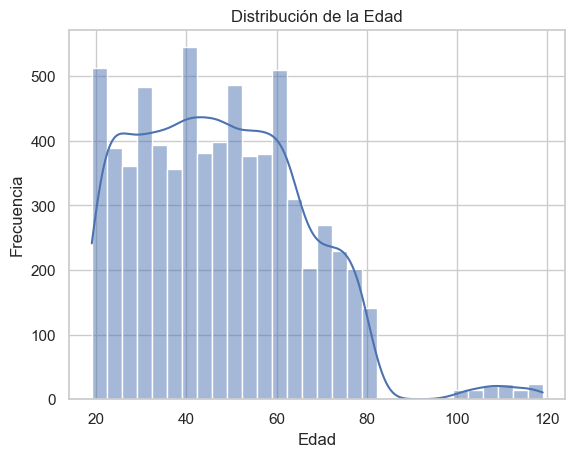

In [11]:
# Histograma de la variable Age
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Distribución de la Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()


In [66]:
# Descripción estadística de todas las variables numéricas
print(df.describe())


       Region     LineCode          1969          1970          1971  \
count  1829.0  1829.000000  1.829000e+03  1.829000e+03  1.829000e+03   
mean      8.0   171.548387  4.338809e+05  4.616178e+05  4.887680e+05   
std       0.0    82.256553  3.836413e+06  4.073469e+06  4.294374e+06   
min       8.0    10.000000  0.000000e+00 -2.000000e+01 -1.410000e+02   
25%       8.0   100.000000  1.421000e+03  1.570000e+03  1.695000e+03   
50%       8.0   180.000000  7.127000e+03  7.422000e+03  8.014000e+03   
75%       8.0   240.000000  5.416100e+04  5.730900e+04  6.097700e+04   
max       8.0   310.000000  9.216005e+07  9.941746e+07  1.059872e+08   

               1972          1973          1974          1975          1976  \
count  1.829000e+03  1.829000e+03  1.829000e+03  1.829000e+03  1.829000e+03   
mean   5.359936e+05  5.872779e+05  6.486914e+05  7.098372e+05  7.878434e+05   
std    4.713435e+06  5.165831e+06  5.703058e+06  6.222987e+06  6.922207e+06   
min   -6.690000e+02 -5.520000e+02  

In [ ]:
# Matriz de correlación y heatmap
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación')
plt.show()


In [12]:
df.replace({'Yes': 1, 'No': 0, 'M': 1, 'F': 0, 'Male': 1, 'Female': 0}, inplace=True)
df.head()

,Customer ID,Count,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents
0,8779-QRDMV,1,1,78,0,1,0,0,0
1,7495-OOKFY,1,0,74,0,1,1,1,1
2,1658-BYGOY,1,1,71,0,1,0,1,3
3,4598-XLKNJ,1,0,78,0,1,1,1,1
4,4846-WHAFZ,1,0,80,0,1,1,1,1


In [13]:
# Eliminar columnas específicas
columns_to_drop = ['Count']
df = df.drop(columns=columns_to_drop)

df.head()

,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents
0,8779-QRDMV,1,78,0,1,0,0,0
1,7495-OOKFY,0,74,0,1,1,1,1
2,1658-BYGOY,1,71,0,1,0,1,3
3,4598-XLKNJ,0,78,0,1,1,1,1
4,4846-WHAFZ,0,80,0,1,1,1,1


In [14]:
df_demographics = df
df_demographics

,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents
0,8779-QRDMV,1,78,0,1,0,0,0
1,7495-OOKFY,0,74,0,1,1,1,1
2,1658-BYGOY,1,71,0,1,0,1,3
3,4598-XLKNJ,0,78,0,1,1,1,1
4,4846-WHAFZ,0,80,0,1,1,1,1
...,...,...,...,...,...,...,...,...
7038,3389-KTRXV,0,115,0,0,1,1,3
7039,4020-KIUDI,1,108,0,0,1,1,2
7040,0970-QXPXW,0,116,1,0,0,0,0
7041,2133-TSRRM,0,109,0,0,0,1,3


In [15]:
# Limpiamos Telco_customer_churn_location.csv

# Ruta del archivo ZIP
zip_file_path = "Churn.zip"
csv_filename = "Telco_customer_churn_location.csv"  # Nombre del archivo CSV dentro del ZIP

# Leer el archivo CSV directamente desde el archivo ZIP
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    with zip_ref.open(csv_filename) as file:
        df = pd.read_csv(file)

# Mostrar las primeras filas para verificar que se ha leído correctamente
df.head()

,Customer ID,Count,Country,State,City,Zip Code,Latitude,Longitude
0,8779-QRDMV,1,United States,California,Los Angeles,90022,34.023810,-118.156582
1,7495-OOKFY,1,United States,California,Los Angeles,90063,34.044271,-118.185237
2,1658-BYGOY,1,United States,California,Los Angeles,90065,34.108833,-118.229715
3,4598-XLKNJ,1,United States,California,Inglewood,90303,33.936291,-118.332639
4,4846-WHAFZ,1,United States,California,Whittier,90602,33.972119,-118.020188


In [16]:
# Eliminar columnas específicas
columns_to_drop = ['Count','Country', 'State']
df = df.drop(columns=columns_to_drop)
df.head()

,Customer ID,City,Zip Code,Latitude,Longitude
0,8779-QRDMV,Los Angeles,90022,34.023810,-118.156582
1,7495-OOKFY,Los Angeles,90063,34.044271,-118.185237
2,1658-BYGOY,Los Angeles,90065,34.108833,-118.229715
3,4598-XLKNJ,Inglewood,90303,33.936291,-118.332639
4,4846-WHAFZ,Whittier,90602,33.972119,-118.020188


In [17]:
df_location = df
df_location

,Customer ID,City,Zip Code,Latitude,Longitude
0,8779-QRDMV,Los Angeles,90022,34.023810,-118.156582
1,7495-OOKFY,Los Angeles,90063,34.044271,-118.185237
2,1658-BYGOY,Los Angeles,90065,34.108833,-118.229715
3,4598-XLKNJ,Inglewood,90303,33.936291,-118.332639
4,4846-WHAFZ,Whittier,90602,33.972119,-118.020188
...,...,...,...,...,...
7038,2569-WGERO,Landers,92285,34.341737,-116.539416
7039,6840-RESVB,Adelanto,92301,34.667815,-117.536183
7040,2234-XADUH,Amboy,92304,34.559882,-115.637164
7041,4801-JZAZL,Angelus Oaks,92305,34.167800,-116.864330


In [18]:
#**Limpiamos Telco_customer_churn_population.csv**

# Ruta del archivo ZIP
zip_file_path = "Churn.zip"
csv_filename = "Telco_customer_churn_population.csv"  # Nombre del archivo CSV dentro del ZIP

# Leer el archivo CSV directamente desde el archivo ZIP
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    with zip_ref.open(csv_filename) as file:
        df = pd.read_csv(file)

# Mostrar las primeras filas para verificar que se ha leído correctamente
df.head()


,ID,Zip Code,Population
0,1,90001,54492
1,2,90002,44586
2,3,90003,58198
3,4,90004,67852
4,5,90005,43019


In [19]:
# Eliminar columnas específicas
columns_to_drop = ['ID']
df = df.drop(columns=columns_to_drop)
df.head()

,Zip Code,Population
0,90001,54492
1,90002,44586
2,90003,58198
3,90004,67852
4,90005,43019


In [20]:
df_population = df 
df_population

,Zip Code,Population
0,90001,54492
1,90002,44586
2,90003,58198
3,90004,67852
4,90005,43019
...,...,...
1666,96145,4002
1667,96146,942
1668,96148,678
1669,96150,33038


In [21]:
# Se une df_location con df_population para formar un solo DF realacionado por Zip Code**


# Unir los DataFrames en una sola tabla usando 'Zip Code'
df_merged = pd.merge(df_location, df_population, on='Zip Code')
# Mostrar el DataFrame resultante
df_merged.head()

,Customer ID,City,Zip Code,Latitude,Longitude,Population
0,8779-QRDMV,Los Angeles,90022,34.02381,-118.156582,68701
1,4737-AQCPU,Los Angeles,90022,34.02381,-118.156582,68701
2,5043-TRZWM,Los Angeles,90022,34.02381,-118.156582,68701
3,8165-CBKXO,Los Angeles,90022,34.02381,-118.156582,68701
4,9979-RGMZT,Los Angeles,90022,34.02381,-118.156582,68701


In [22]:
# Limpieza Telco_customer_churn_services.csv
# Ruta del archivo ZIP
zip_file_path = "Churn.zip"
csv_filename = "Telco_customer_churn_services.csv"  # Nombre del archivo CSV dentro del ZIP

# Leer el archivo CSV directamente desde el archivo ZIP
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    with zip_ref.open(csv_filename) as file:
        df = pd.read_csv(file)

# Mostrar las primeras filas para verificar que se ha leído correctamente
df.head()

,Customer ID,Count,Quarter,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,...,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
0,8779-QRDMV,1,Q3,No,0,1,NaN,No,0.00,No,...,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65
1,7495-OOKFY,1,Q3,Yes,1,8,Offer E,Yes,48.85,Yes,...,Yes,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,0,390.80,1024.10
2,1658-BYGOY,1,Q3,No,0,18,Offer D,Yes,11.33,Yes,...,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88
3,4598-XLKNJ,1,Q3,Yes,1,25,Offer C,Yes,19.76,No,...,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07
4,4846-WHAFZ,1,Q3,Yes,1,37,Offer C,Yes,6.33,Yes,...,Yes,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,0.00,0,234.21,3102.36


In [23]:
# Eliminar columnas específicas
columns_to_drop = ['Count', 'Count','Quarter']
df = df.drop(columns=columns_to_drop)
df.replace({'Yes': 1, 'No': 0}, inplace=True)
df.head()

,Customer ID,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,...,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
0,8779-QRDMV,0,0,1,NaN,0,0.00,0,1,DSL,...,0,Month-to-Month,1,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65
1,7495-OOKFY,1,1,8,Offer E,1,48.85,1,1,Fiber Optic,...,1,Month-to-Month,1,Credit Card,80.65,633.30,0.00,0,390.80,1024.10
2,1658-BYGOY,0,0,18,Offer D,1,11.33,1,1,Fiber Optic,...,1,Month-to-Month,1,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88
3,4598-XLKNJ,1,1,25,Offer C,1,19.76,0,1,Fiber Optic,...,1,Month-to-Month,1,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07
4,4846-WHAFZ,1,1,37,Offer C,1,6.33,1,1,Fiber Optic,...,1,Month-to-Month,1,Bank Withdrawal,76.50,2868.15,0.00,0,234.21,3102.36


In [24]:
df_services = df
df_services

,Customer ID,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,...,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
0,8779-QRDMV,0,0,1,NaN,0,0.00,0,1,DSL,...,0,Month-to-Month,1,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65
1,7495-OOKFY,1,1,8,Offer E,1,48.85,1,1,Fiber Optic,...,1,Month-to-Month,1,Credit Card,80.65,633.30,0.00,0,390.80,1024.10
2,1658-BYGOY,0,0,18,Offer D,1,11.33,1,1,Fiber Optic,...,1,Month-to-Month,1,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88
3,4598-XLKNJ,1,1,25,Offer C,1,19.76,0,1,Fiber Optic,...,1,Month-to-Month,1,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07
4,4846-WHAFZ,1,1,37,Offer C,1,6.33,1,1,Fiber Optic,...,1,Month-to-Month,1,Bank Withdrawal,76.50,2868.15,0.00,0,234.21,3102.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9388-ZEYVT,0,0,43,Offer B,0,0.00,0,1,DSL,...,1,One Year,0,Bank Withdrawal,-6.00,1931.30,0.00,0,0.00,1931.30
7039,6898-RBTLU,1,9,49,Offer B,1,16.60,1,1,DSL,...,1,Two Year,0,Bank Withdrawal,-2.00,3902.45,0.00,0,813.40,4715.85
7040,5681-LLOEI,1,11,43,NaN,1,42.22,1,1,Fiber Optic,...,1,One Year,1,Credit Card,-2.00,4013.80,25.49,0,1815.46,5803.77
7041,1036-GUDCL,1,1,60,NaN,1,39.76,0,1,DSL,...,1,Month-to-Month,1,Credit Card,-9.00,4663.40,0.00,0,2385.60,7049.00


In [25]:
#  DataFrames df_services, df_demographics, df_Status y df_merged ya están definidos

# Unificar df_services con df_demographics
df_combined = df_services.merge(df_demographics, on="Customer ID", how="left")

# Unificar df_combined con df_Status
df_combined = df_combined.merge(df_Status, on="Customer ID", how="left")

# Unificar df_combined con df_merged
df_combined = df_combined.merge(df_merged, on="Customer ID", how="left")

# Verificar el DataFrame unificado
df_combined.head()


,Customer ID,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,...,Dependents,Number of Dependents,Churn Value,Churn Category,Churn Reason,City,Zip Code,Latitude,Longitude,Population
0,8779-QRDMV,0,0,1,NaN,0,0.00,0,1,DSL,...,0,0,1,Competitor,Competitor offered more data,Los Angeles,90022,34.023810,-118.156582,68701
1,7495-OOKFY,1,1,8,Offer E,1,48.85,1,1,Fiber Optic,...,1,1,1,Competitor,Competitor made better offer,Los Angeles,90063,34.044271,-118.185237,55668
2,1658-BYGOY,0,0,18,Offer D,1,11.33,1,1,Fiber Optic,...,1,3,1,Competitor,Competitor made better offer,Los Angeles,90065,34.108833,-118.229715,47534
3,4598-XLKNJ,1,1,25,Offer C,1,19.76,0,1,Fiber Optic,...,1,1,1,Dissatisfaction,Limited range of services,Inglewood,90303,33.936291,-118.332639,27778
4,4846-WHAFZ,1,1,37,Offer C,1,6.33,1,1,Fiber Optic,...,1,1,1,Price,Extra data charges,Whittier,90602,33.972119,-118.020188,26265


In [26]:
# Eliminar duplicados basados en la columna 'Customer ID'
df_combined = df_combined.drop_duplicates(subset='Customer ID')
df_churn = df_combined
# DF churn consolidado
df_churn

,Customer ID,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,...,Dependents,Number of Dependents,Churn Value,Churn Category,Churn Reason,City,Zip Code,Latitude,Longitude,Population
0,8779-QRDMV,0,0,1,NaN,0,0.00,0,1,DSL,...,0,0,1,Competitor,Competitor offered more data,Los Angeles,90022,34.023810,-118.156582,68701
1,7495-OOKFY,1,1,8,Offer E,1,48.85,1,1,Fiber Optic,...,1,1,1,Competitor,Competitor made better offer,Los Angeles,90063,34.044271,-118.185237,55668
2,1658-BYGOY,0,0,18,Offer D,1,11.33,1,1,Fiber Optic,...,1,3,1,Competitor,Competitor made better offer,Los Angeles,90065,34.108833,-118.229715,47534
3,4598-XLKNJ,1,1,25,Offer C,1,19.76,0,1,Fiber Optic,...,1,1,1,Dissatisfaction,Limited range of services,Inglewood,90303,33.936291,-118.332639,27778
4,4846-WHAFZ,1,1,37,Offer C,1,6.33,1,1,Fiber Optic,...,1,1,1,Price,Extra data charges,Whittier,90602,33.972119,-118.020188,26265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9388-ZEYVT,0,0,43,Offer B,0,0.00,0,1,DSL,...,0,0,0,NaN,NaN,Gardena,90247,33.890853,-118.297967,47758
7039,6898-RBTLU,1,9,49,Offer B,1,16.60,1,1,DSL,...,1,1,0,NaN,NaN,Whittier,90602,33.972119,-118.020188,26265
7040,5681-LLOEI,1,11,43,NaN,1,42.22,1,1,Fiber Optic,...,1,1,0,NaN,NaN,Encino,91316,34.150354,-118.518292,27614
7041,1036-GUDCL,1,1,60,NaN,1,39.76,0,1,DSL,...,1,3,0,NaN,NaN,Oak Park,91377,34.192250,-118.776874,14814


In [27]:
# Limpieza 2da Fuente de Datos Gubernamental CAINC1.ZIP

# Descomprimir el archivo ZIP y cargar el archivo CSV hasta el registro 178
with zipfile.ZipFile('CAINC1.zip', 'r') as zip_ref:
    zip_ref.extractall('CAINC1')

# Cargar el archivo CSV completo en un DataFrame, limitando a 178 registros
df = pd.read_csv('CAINC1/CAINC1_CA_1969_2022.csv', nrows=178)

# Eliminar las comillas de la columna GeoFIPS
df['GeoFIPS'] = df['GeoFIPS'].str.replace('"', '')

# Eliminar los tres primeros números de la columna GeoFIPS y convertir a string
df['GeoFIPS'] = df['GeoFIPS'].str[3:]


# Continuar con el resto del procesamiento

# Filtrar las columnas necesarias
df_filtered = df[['GeoFIPS', 'Description', '2022']]

# Eliminar duplicados
df_filtered.drop_duplicates(inplace=True)

# Pivotar la tabla para tener Description como header y GeoFIPS como índice
df_pivoted = df_filtered.pivot(index='GeoFIPS', columns='Description', values='2022')

# Reiniciar el índice
df_pivoted.reset_index(inplace=True)

# Eliminar el nombre de las columnas del índice
df_pivoted.columns.name = None

# Eliminar la columna con encabezado NaN
df_pivoted = df_pivoted.loc[:, ~df_pivoted.columns.isna()]

# Eliminar filas con NaN en cualquier columna
df_pivoted.dropna(how='all', inplace=True)

# Mostrar el DataFrame final
df_CAINC1 = df_pivoted
df_CAINC1.head()


,GeoFIPS,Per capita personal income (dollars) 2/,Personal income (thousands of dollars),Population (persons) 1/
0,000,77036.0,3.006647e+09,39029342.0
1,001,97754.0,1.592411e+08,1628997.0
2,003,67551.0,8.038600e+04,1190.0
3,005,48463.0,2.006939e+06,41412.0
4,007,54974.0,1.139634e+07,207303.0


In [28]:
# Eliminar filas con valores nulos
df_CAINC1.dropna(inplace=True)

In [29]:
# Limpieza 2da Fuente de Datos Gubernamental CAINC30.ZIP
# Descomprimir el archivo ZIP y cargar el archivo CSV
with zipfile.ZipFile('CAINC30.zip', 'r') as zip_ref:
    zip_ref.extractall('CAINC30')

# Cargar el archivo CSV completo en un DataFrame
df = pd.read_csv('CAINC30/CAINC30_CA_1969_2022.csv')

# Eliminar las comillas de la columna GeoFIPS
df['GeoFIPS'] = df['GeoFIPS'].str.replace('"', '')

# Eliminar los tres primeros números de la columna GeoFIPS y convertir a string
df['GeoFIPS'] = df['GeoFIPS'].str[3:]

# Filtrar las columnas necesarias
df_filtered = df[['GeoFIPS', 'Description', '2022']]

# Eliminar duplicados
df_filtered.drop_duplicates(inplace=True)

# Pivotar la tabla para tener Description como header y GeoFIPS como índice
df_pivoted = df_filtered.pivot(index='GeoFIPS', columns='Description', values='2022')

# Reiniciar el índice
df_pivoted.reset_index(inplace=True)

# Eliminar el nombre de las columnas del índice
df_pivoted.columns.name = None

# Eliminar la columna con encabezado NaN
df_pivoted = df_pivoted.loc[:, ~df_pivoted.columns.isna()]

# Eliminar filas con NaN en cualquier columna
df_pivoted.dropna(how='all', inplace=True)

# Eliminar el registro 0
df_CAINC30 = df_pivoted.iloc[1:]

# Eliminar filas con valores nulos
df_CAINC30.dropna(inplace=True)

# Mostrar el DataFrame final
df_CAINC30.head()


,GeoFIPS,Employer contributions for employee pension and insurance funds 5/,Employer contributions for government social insurance,Farm proprietors' income,Nonfarm proprietors' income,Farm proprietors employment 6/,Income maintenance benefits 1/,Nonfarm proprietors employment,Per capita income maintenance benefits 4/,Per capita retirement and other 4/,...,Per capita net earnings 4/,Per capita personal current transfer receipts 4/,Per capita personal income 4/,Personal current transfer receipts,Population (persons) 3/,Proprietors employment,Wage and salary employment,Average earnings per job (dollars),Personal income (thousands of dollars),Total employment (number of jobs)
1,000,222888068.0,100153037.0,7699661.0,230460247.0,55474.0,67953536.0,6431184.0,1741.0,10527.0,...,49578.0,12385.0,77036.0,483364725.0,39029342.0,6486658.0,18814316.0,85710.0,3.006647e+09,25300974.0
2,001,10955073.0,5225511.0,31062.0,12633213.0,316.0,2421858.0,255691.0,1487.0,10485.0,...,69489.0,12066.0,97754.0,19655203.0,1628997.0,256007.0,844952.0,99419.0,1.592411e+08,1100959.0
3,003,9036.0,3687.0,0.0,1258.0,0.0,1745.0,177.0,1466.0,16918.0,...,33389.0,18512.0,67551.0,22029.0,1190.0,177.0,983.0,62828.0,8.038600e+04,1160.0
4,005,175290.0,43587.0,-951.0,131906.0,337.0,44706.0,5234.0,1080.0,13224.0,...,24780.0,14388.0,48463.0,595847.0,41412.0,5571.0,12805.0,58025.0,2.006939e+06,18376.0
5,007,906838.0,319461.0,51242.0,923526.0,1493.0,424778.0,25089.0,2049.0,13454.0,...,30028.0,15613.0,54974.0,3236562.0,207303.0,26582.0,85322.0,60923.0,1.139634e+07,111904.0


In [30]:
# Unir los DataFrames por la columna 'GeoName'
df_combined = pd.merge(df_CAINC1, df_CAINC30, on='GeoFIPS')

# Identificar columnas duplicadas (sin contar 'GeoFIPS')
duplicate_columns = [col for col in df_combined.columns if col.endswith('_x') or col.endswith('_y')]

# Eliminar las columnas duplicadas
df_combined.drop(columns=duplicate_columns, inplace=True)

# Unir los DataFrames por la columna 'GeoFIPS'
df_combined = pd.merge(df_CAINC1, df_CAINC30, on='GeoFIPS')

# Eliminar columnas duplicadas, manteniendo solo la primera aparición
df_combined = df_combined.loc[:, ~df_combined.columns.duplicated()]


In [31]:
df_CAINC = df_combined
df_CAINC.head()

,GeoFIPS,Per capita personal income (dollars) 2/,Personal income (thousands of dollars) _x,Population (persons) 1/,Employer contributions for employee pension and insurance funds 5/,Employer contributions for government social insurance,Farm proprietors' income,Nonfarm proprietors' income,Farm proprietors employment 6/,Income maintenance benefits 1/,...,Per capita net earnings 4/,Per capita personal current transfer receipts 4/,Per capita personal income 4/,Personal current transfer receipts,Population (persons) 3/,Proprietors employment,Wage and salary employment,Average earnings per job (dollars),Personal income (thousands of dollars) _y,Total employment (number of jobs)
0,000,77036.0,3.006647e+09,39029342.0,222888068.0,100153037.0,7699661.0,230460247.0,55474.0,67953536.0,...,49578.0,12385.0,77036.0,483364725.0,39029342.0,6486658.0,18814316.0,85710.0,3.006647e+09,25300974.0
1,001,97754.0,1.592411e+08,1628997.0,10955073.0,5225511.0,31062.0,12633213.0,316.0,2421858.0,...,69489.0,12066.0,97754.0,19655203.0,1628997.0,256007.0,844952.0,99419.0,1.592411e+08,1100959.0
2,003,67551.0,8.038600e+04,1190.0,9036.0,3687.0,0.0,1258.0,0.0,1745.0,...,33389.0,18512.0,67551.0,22029.0,1190.0,177.0,983.0,62828.0,8.038600e+04,1160.0
3,005,48463.0,2.006939e+06,41412.0,175290.0,43587.0,-951.0,131906.0,337.0,44706.0,...,24780.0,14388.0,48463.0,595847.0,41412.0,5571.0,12805.0,58025.0,2.006939e+06,18376.0
4,007,54974.0,1.139634e+07,207303.0,906838.0,319461.0,51242.0,923526.0,1493.0,424778.0,...,30028.0,15613.0,54974.0,3236562.0,207303.0,26582.0,85322.0,60923.0,1.139634e+07,111904.0


In [32]:
# Cargar Telco_customer_churn_location_with_city_county_code.csv y eliminar filas con valores nulos
telco_df = pd.read_csv("Telco_customer_churn_location_with_city_county_code.csv").dropna()

# Convertir County_Code a entero y luego a string
telco_df['County_Code'] = telco_df['County_Code'].astype(int).astype(str)

# Agregar '0' al inicio si tiene 1 o 2 dígitos
telco_df['County_Code'] = telco_df['County_Code'].apply(lambda x: x.zfill(3))

# Fusionar los dataframes usando GeoFIPS y County_Code
merged_df = pd.merge(df_CAINC, telco_df, left_on='GeoFIPS', right_on='County_Code', how='left')

# Eliminar columnas duplicadas
merged_df.drop(columns=['County_Code'], inplace=True)

# Eliminar filas donde GeoFIPS es igual a "000"
merged_df = merged_df[merged_df['GeoFIPS'] != '000']

# Eliminar campos adicionales
merged_df.drop(columns=['Customer ID', 'Count', 'Country', 'State', 'City', 'Latitude', 'Longitude'], inplace=True)

# Eliminar filas con valores nulos
merged_df.dropna(inplace=True)
merged_df.info()

# Mostrar el DataFrame fusionado sin duplicados
merged_df.head(500)


<class 'pandas.core.frame.DataFrame'>
Index: 7039 entries, 1 to 7039
Data columns (total 36 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   GeoFIPS                                                                7039 non-null   object 
 1   Per capita personal income (dollars) 2/                                7039 non-null   float64
 2   Personal income (thousands of dollars) _x                              7039 non-null   float64
 3   Population (persons) 1/                                                7039 non-null   float64
 4      Employer contributions for employee pension and insurance funds 5/  7039 non-null   float64
 5      Employer contributions for government social insurance              7039 non-null   float64
 6      Farm proprietors' income                                            7039 non-null   float6

,GeoFIPS,Per capita personal income (dollars) 2/,Personal income (thousands of dollars) _x,Population (persons) 1/,Employer contributions for employee pension and insurance funds 5/,Employer contributions for government social insurance,Farm proprietors' income,Nonfarm proprietors' income,Farm proprietors employment 6/,Income maintenance benefits 1/,...,Per capita personal current transfer receipts 4/,Per capita personal income 4/,Personal current transfer receipts,Population (persons) 3/,Proprietors employment,Wage and salary employment,Average earnings per job (dollars),Personal income (thousands of dollars) _y,Total employment (number of jobs),Zip Code
1,001,97754.0,159241119.0,1628997.0,10955073.0,5225511.0,31062.0,12633213.0,316.0,2421858.0,...,12066.0,97754.0,19655203.0,1628997.0,256007.0,844952.0,99419.0,159241119.0,1100959.0,94539.0
2,001,97754.0,159241119.0,1628997.0,10955073.0,5225511.0,31062.0,12633213.0,316.0,2421858.0,...,12066.0,97754.0,19655203.0,1628997.0,256007.0,844952.0,99419.0,159241119.0,1100959.0,94550.0
3,001,97754.0,159241119.0,1628997.0,10955073.0,5225511.0,31062.0,12633213.0,316.0,2421858.0,...,12066.0,97754.0,19655203.0,1628997.0,256007.0,844952.0,99419.0,159241119.0,1100959.0,94566.0
4,001,97754.0,159241119.0,1628997.0,10955073.0,5225511.0,31062.0,12633213.0,316.0,2421858.0,...,12066.0,97754.0,19655203.0,1628997.0,256007.0,844952.0,99419.0,159241119.0,1100959.0,94588.0
5,001,97754.0,159241119.0,1628997.0,10955073.0,5225511.0,31062.0,12633213.0,316.0,2421858.0,...,12066.0,97754.0,19655203.0,1628997.0,256007.0,844952.0,99419.0,159241119.0,1100959.0,94704.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,013,95047.0,109965993.0,1156966.0,4820484.0,2228673.0,23020.0,7567337.0,434.0,1349628.0,...,11667.0,95047.0,13498744.0,1156966.0,198886.0,397089.0,80676.0,109965993.0,595975.0,94506.0
497,013,95047.0,109965993.0,1156966.0,4820484.0,2228673.0,23020.0,7567337.0,434.0,1349628.0,...,11667.0,95047.0,13498744.0,1156966.0,198886.0,397089.0,80676.0,109965993.0,595975.0,94507.0
498,013,95047.0,109965993.0,1156966.0,4820484.0,2228673.0,23020.0,7567337.0,434.0,1349628.0,...,11667.0,95047.0,13498744.0,1156966.0,198886.0,397089.0,80676.0,109965993.0,595975.0,94509.0
499,013,95047.0,109965993.0,1156966.0,4820484.0,2228673.0,23020.0,7567337.0,434.0,1349628.0,...,11667.0,95047.0,13498744.0,1156966.0,198886.0,397089.0,80676.0,109965993.0,595975.0,94511.0


In [33]:
num_filas, num_columnas = merged_df.shape
print("Número de filas:", num_filas)
print("Número de columnas:", num_columnas)


Número de filas: 7039
Número de columnas: 36


In [34]:
df_CAINC = merged_df
df_CAINC

,GeoFIPS,Per capita personal income (dollars) 2/,Personal income (thousands of dollars) _x,Population (persons) 1/,Employer contributions for employee pension and insurance funds 5/,Employer contributions for government social insurance,Farm proprietors' income,Nonfarm proprietors' income,Farm proprietors employment 6/,Income maintenance benefits 1/,...,Per capita personal current transfer receipts 4/,Per capita personal income 4/,Personal current transfer receipts,Population (persons) 3/,Proprietors employment,Wage and salary employment,Average earnings per job (dollars),Personal income (thousands of dollars) _y,Total employment (number of jobs),Zip Code
1,001,97754.0,159241119.0,1628997.0,10955073.0,5225511.0,31062.0,12633213.0,316.0,2421858.0,...,12066.0,97754.0,19655203.0,1628997.0,256007.0,844952.0,99419.0,159241119.0,1100959.0,94539.0
2,001,97754.0,159241119.0,1628997.0,10955073.0,5225511.0,31062.0,12633213.0,316.0,2421858.0,...,12066.0,97754.0,19655203.0,1628997.0,256007.0,844952.0,99419.0,159241119.0,1100959.0,94550.0
3,001,97754.0,159241119.0,1628997.0,10955073.0,5225511.0,31062.0,12633213.0,316.0,2421858.0,...,12066.0,97754.0,19655203.0,1628997.0,256007.0,844952.0,99419.0,159241119.0,1100959.0,94566.0
4,001,97754.0,159241119.0,1628997.0,10955073.0,5225511.0,31062.0,12633213.0,316.0,2421858.0,...,12066.0,97754.0,19655203.0,1628997.0,256007.0,844952.0,99419.0,159241119.0,1100959.0,94588.0
5,001,97754.0,159241119.0,1628997.0,10955073.0,5225511.0,31062.0,12633213.0,316.0,2421858.0,...,12066.0,97754.0,19655203.0,1628997.0,256007.0,844952.0,99419.0,159241119.0,1100959.0,94704.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7035,115,48204.0,4064114.0,84310.0,434570.0,116109.0,18431.0,133611.0,606.0,188298.0,...,15772.0,48204.0,1329743.0,84310.0,7864.0,25443.0,69606.0,4064114.0,33307.0,95918.0
7036,115,48204.0,4064114.0,84310.0,434570.0,116109.0,18431.0,133611.0,606.0,188298.0,...,15772.0,48204.0,1329743.0,84310.0,7864.0,25443.0,69606.0,4064114.0,33307.0,95922.0
7037,115,48204.0,4064114.0,84310.0,434570.0,116109.0,18431.0,133611.0,606.0,188298.0,...,15772.0,48204.0,1329743.0,84310.0,7864.0,25443.0,69606.0,4064114.0,33307.0,95925.0
7038,115,48204.0,4064114.0,84310.0,434570.0,116109.0,18431.0,133611.0,606.0,188298.0,...,15772.0,48204.0,1329743.0,84310.0,7864.0,25443.0,69606.0,4064114.0,33307.0,95961.0


In [35]:
num_filas, num_columnas = df_churn.shape
print("Número de filas:", num_filas)
print("Número de columnas:", num_columnas)
df_churn.head()

Número de filas: 7043
Número de columnas: 43


,Customer ID,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,...,Dependents,Number of Dependents,Churn Value,Churn Category,Churn Reason,City,Zip Code,Latitude,Longitude,Population
0,8779-QRDMV,0,0,1,NaN,0,0.00,0,1,DSL,...,0,0,1,Competitor,Competitor offered more data,Los Angeles,90022,34.023810,-118.156582,68701
1,7495-OOKFY,1,1,8,Offer E,1,48.85,1,1,Fiber Optic,...,1,1,1,Competitor,Competitor made better offer,Los Angeles,90063,34.044271,-118.185237,55668
2,1658-BYGOY,0,0,18,Offer D,1,11.33,1,1,Fiber Optic,...,1,3,1,Competitor,Competitor made better offer,Los Angeles,90065,34.108833,-118.229715,47534
3,4598-XLKNJ,1,1,25,Offer C,1,19.76,0,1,Fiber Optic,...,1,1,1,Dissatisfaction,Limited range of services,Inglewood,90303,33.936291,-118.332639,27778
4,4846-WHAFZ,1,1,37,Offer C,1,6.33,1,1,Fiber Optic,...,1,1,1,Price,Extra data charges,Whittier,90602,33.972119,-118.020188,26265


In [36]:

# Convertir las columnas 'Zip Code' a enteros
df_churn['Zip Code'] = pd.to_numeric(df_churn['Zip Code'], errors='coerce').astype('Int64')
df_CAINC['Zip Code'] = pd.to_numeric(df_CAINC['Zip Code'], errors='coerce').astype('Int64')

# Realizar una unión de tipo 'left' para mantener todos los registros de df_churn
merged_df = pd.merge(df_churn, df_CAINC, on='Zip Code', how='left')

In [37]:
# Eliminar registros con valores nulos
merged_df_clean = merged_df.dropna()

In [38]:
num_filas, num_columnas = merged_df.shape
print("Número de filas:", num_filas)
print("Número de columnas:", num_columnas)
merged_df.head()

Número de filas: 38075
Número de columnas: 78


,Customer ID,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,...,Per capita net earnings 4/,Per capita personal current transfer receipts 4/,Per capita personal income 4/,Personal current transfer receipts,Population (persons) 3/,Proprietors employment,Wage and salary employment,Average earnings per job (dollars),Personal income (thousands of dollars) _y,Total employment (number of jobs)
0,8779-QRDMV,0,0,1,NaN,0,0.0,0,1,DSL,...,45090.0,14353.0,74142.0,139526360.0,9721138.0,1962132.0,4843059.0,77731.0,720740528.0,6805191.0
1,8779-QRDMV,0,0,1,NaN,0,0.0,0,1,DSL,...,45090.0,14353.0,74142.0,139526360.0,9721138.0,1962132.0,4843059.0,77731.0,720740528.0,6805191.0
2,8779-QRDMV,0,0,1,NaN,0,0.0,0,1,DSL,...,45090.0,14353.0,74142.0,139526360.0,9721138.0,1962132.0,4843059.0,77731.0,720740528.0,6805191.0
3,8779-QRDMV,0,0,1,NaN,0,0.0,0,1,DSL,...,45090.0,14353.0,74142.0,139526360.0,9721138.0,1962132.0,4843059.0,77731.0,720740528.0,6805191.0
4,8779-QRDMV,0,0,1,NaN,0,0.0,0,1,DSL,...,45090.0,14353.0,74142.0,139526360.0,9721138.0,1962132.0,4843059.0,77731.0,720740528.0,6805191.0


In [39]:
# Eliminar filas duplicadas
merged_df = merged_df.drop_duplicates()
merged_df

,Customer ID,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,...,Per capita net earnings 4/,Per capita personal current transfer receipts 4/,Per capita personal income 4/,Personal current transfer receipts,Population (persons) 3/,Proprietors employment,Wage and salary employment,Average earnings per job (dollars),Personal income (thousands of dollars) _y,Total employment (number of jobs)
0,8779-QRDMV,0,0,1,NaN,0,0.00,0,1,DSL,...,45090.0,14353.0,74142.0,139526360.0,9721138.0,1962132.0,4843059.0,77731.0,720740528.0,6805191.0
5,7495-OOKFY,1,1,8,Offer E,1,48.85,1,1,Fiber Optic,...,45090.0,14353.0,74142.0,139526360.0,9721138.0,1962132.0,4843059.0,77731.0,720740528.0,6805191.0
10,1658-BYGOY,0,0,18,Offer D,1,11.33,1,1,Fiber Optic,...,45090.0,14353.0,74142.0,139526360.0,9721138.0,1962132.0,4843059.0,77731.0,720740528.0,6805191.0
15,4598-XLKNJ,1,1,25,Offer C,1,19.76,0,1,Fiber Optic,...,45090.0,14353.0,74142.0,139526360.0,9721138.0,1962132.0,4843059.0,77731.0,720740528.0,6805191.0
20,4846-WHAFZ,1,1,37,Offer C,1,6.33,1,1,Fiber Optic,...,45090.0,14353.0,74142.0,139526360.0,9721138.0,1962132.0,4843059.0,77731.0,720740528.0,6805191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38050,9388-ZEYVT,0,0,43,Offer B,0,0.00,0,1,DSL,...,45090.0,14353.0,74142.0,139526360.0,9721138.0,1962132.0,4843059.0,77731.0,720740528.0,6805191.0
38055,6898-RBTLU,1,9,49,Offer B,1,16.60,1,1,DSL,...,45090.0,14353.0,74142.0,139526360.0,9721138.0,1962132.0,4843059.0,77731.0,720740528.0,6805191.0
38060,5681-LLOEI,1,11,43,NaN,1,42.22,1,1,Fiber Optic,...,45090.0,14353.0,74142.0,139526360.0,9721138.0,1962132.0,4843059.0,77731.0,720740528.0,6805191.0
38065,1036-GUDCL,1,1,60,NaN,1,39.76,0,1,DSL,...,48459.0,11422.0,76375.0,9509852.0,832605.0,137252.0,354796.0,71125.0,63589878.0,492048.0


In [40]:
'Total Long Distance Charges', 'Total Revenue'


('Total Long Distance Charges', 'Total Revenue')

In [41]:
# Eliminar las columnas 'Customer ID', 'Churn Category' y 'Churn Reason'
merged_df = merged_df.drop(['Customer ID', 'Churn Category', 'Churn Reason'], axis=1)

In [42]:

# Guardar el DataFrame en un archivo CSV llamado 'merged_df.csv'
merged_df.to_csv('merged_df16.csv', index=False)


In [43]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 38070
Data columns (total 75 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Referred a Friend                                                      7043 non-null   int64  
 1   Number of Referrals                                                    7043 non-null   int64  
 2   Tenure in Months                                                       7043 non-null   int64  
 3   Offer                                                                  3166 non-null   object 
 4   Phone Service                                                          7043 non-null   int64  
 5   Avg Monthly Long Distance Charges                                      7043 non-null   float64
 6   Multiple Lines                                                         7043 non-null   int64

In [44]:

# Listar los campos nulos en merged_df
nulos = merged_df.isnull().sum()

# Filtrar para mostrar solo las columnas con valores nulos
nulos = nulos[nulos > 0]

print(nulos)


Offer                                                                    3877
Internet Type                                                            1526
GeoFIPS                                                                     4
Per capita personal income (dollars) 2/                                     4
Personal income (thousands of dollars) _x                                   4
Population (persons) 1/                                                     4
   Employer contributions for employee pension and insurance funds 5/       4
   Employer contributions for government social insurance                   4
   Farm proprietors' income                                                 4
   Nonfarm proprietors' income                                              4
  Farm proprietors employment 6/                                            4
  Income maintenance benefits 1/                                            4
  Nonfarm proprietors employment                                

In [45]:
print(merged_df.columns)


Index(['Referred a Friend', 'Number of Referrals', 'Tenure in Months', 'Offer',
       'Phone Service', 'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Gender', 'Age', 'Under 30', 'Senior Citizen',
       'Married', 'Dependents', 'Number of Dependents', 'Churn Value', 'City',
       'Zip Code', 'Latitude', 'Longitude', 'Population', 'GeoFIPS',
       'Per capita personal income (dollars) 2/',
       'Personal income (thousands of dollars) _x', 'Population (persons) 1/',
       '   Employer contributions for employee pension and insuran

In [46]:
# Listar los campos nulos en merged_df
nulos = merged_df.isnull().sum()

# Filtrar para mostrar solo las columnas con valores nulos
nulos = nulos[nulos > 0]

print(nulos)

Offer                                                                    3877
Internet Type                                                            1526
GeoFIPS                                                                     4
Per capita personal income (dollars) 2/                                     4
Personal income (thousands of dollars) _x                                   4
Population (persons) 1/                                                     4
   Employer contributions for employee pension and insurance funds 5/       4
   Employer contributions for government social insurance                   4
   Farm proprietors' income                                                 4
   Nonfarm proprietors' income                                              4
  Farm proprietors employment 6/                                            4
  Income maintenance benefits 1/                                            4
  Nonfarm proprietors employment                                

In [47]:
import pandas as pd

nuevos_nombres = {
    'GeoFIPS': 'GeoFIPS',
    'Per capita personal income (dollars) 2/': 'Per capita personal income',
    'Personal income (thousands of dollars) _x': 'Personal incomeX',
    'Population (persons) 1/': 'Population',
    '   Employer contributions for employee pension and insurance funds 5/': 'Employer contributions',
    '   Employer contributions for government social insurance ': 'Employer contributions',
    '   Farm proprietors\' income ': 'Farm proprietors income',
    '   Nonfarm proprietors\' income ': 'Nonfarm proprietors income',
    '  Farm proprietors employment 6/': 'Farm proprietors employment',
    '  Income maintenance benefits 1/': 'Income maintenance benefits',
    '  Nonfarm proprietors employment ': 'Nonfarm proprietors employment',
    '  Per capita income maintenance benefits 4/': 'Per capita income maintenance benefits',
    '  Per capita retirement and other 4/': 'Per capita retirement and other',
    '  Per capita unemployment insurance compensation 4/': 'Per capita unemployment insurance compensation',
    '  Proprietors\' income ': 'Proprietors income',
    '  Retirement and other ': 'Retirement and other',
    '  Supplements to wages and salaries ': 'Supplements to wages and salaries',
    '  Unemployment insurance compensation ': 'Unemployment insurance compensation',
    '  Wages and salaries ': 'Wages and salaries',
    ' Average nonfarm proprietors\' income ': 'Average nonfarm proprietors income',
    ' Average wages and salaries ': 'Average wages and salaries',
    ' Dividends, interest, and rent 2/': 'Dividends, interest, and rent',
    ' Earnings by place of work ': 'Earnings by place of work',
    ' Net earnings by place of residence ': 'Net earnings by place of residence',
    ' Per capita dividends, interest, and rent 4/': 'Per capita dividends, interest, and rent',
    ' Per capita net earnings 4/': 'Per capita net earnings',
    ' Per capita personal current transfer receipts 4/': 'Per capita personal current transfer receipts',
    ' Per capita personal income 4/': 'Per capita personal income',
    ' Personal current transfer receipts ': 'Personal current transfer receipts',
    ' Population (persons) 3/': 'Population',
    ' Proprietors employment ': 'Proprietors employment',
    ' Wage and salary employment ': 'Wage and salary employment',
    'Average earnings per job (dollars) ': 'Average earnings per job',
    'Personal income (thousands of dollars) _y': 'Personal incomeY',
    'Total employment (number of jobs) ': 'Total employment'
}

# Renombrar las columnas en merged_df
merged_df.rename(columns=nuevos_nombres, inplace=True)

# Verificar los nuevos nombres de las columnas
print(merged_df.columns)


Index(['Referred a Friend', 'Number of Referrals', 'Tenure in Months', 'Offer',
       'Phone Service', 'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Gender', 'Age', 'Under 30', 'Senior Citizen',
       'Married', 'Dependents', 'Number of Dependents', 'Churn Value', 'City',
       'Zip Code', 'Latitude', 'Longitude', 'Population', 'GeoFIPS',
       'Per capita personal income', 'Personal incomeX', 'Population',
       'Employer contributions', 'Employer contributions',
       'Farm proprietors income', 'Nonfarm proprietors income',
 

In [48]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 38070
Data columns (total 75 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Referred a Friend                               7043 non-null   int64  
 1   Number of Referrals                             7043 non-null   int64  
 2   Tenure in Months                                7043 non-null   int64  
 3   Offer                                           3166 non-null   object 
 4   Phone Service                                   7043 non-null   int64  
 5   Avg Monthly Long Distance Charges               7043 non-null   float64
 6   Multiple Lines                                  7043 non-null   int64  
 7   Internet Service                                7043 non-null   int64  
 8   Internet Type                                   5517 non-null   object 
 9   Avg Monthly GB Download                      

In [49]:
# Lista de columnas con valores nulos que deseas llenar con la media
columnas_con_nulos = [

    
    'Per capita personal income',
    'Personal incomeX',
    'Population',
    'Employer contributions',
    'Farm proprietors income',
    'Nonfarm proprietors income',
    'Farm proprietors employment',
    'Income maintenance benefits',
    'Nonfarm proprietors employment',
    'Per capita income maintenance benefits',
    'Per capita retirement and other',
    'Per capita unemployment insurance compensation',
    'Proprietors income',
    'Retirement and other',
    'Supplements to wages and salaries',
    'Unemployment insurance compensation',
    'Wages and salaries',
    'Average nonfarm proprietors income',
    'Average wages and salaries',
    'Dividends, interest, and rent',
    'Earnings by place of work',
    'Net earnings by place of residence',
    'Per capita dividends, interest, and rent',
    'Per capita net earnings',
    'Per capita personal current transfer receipts',
    'Per capita personal income',
    'Personal current transfer receipts',
    'Proprietors employment',
    'Wage and salary employment',
    'Average earnings per job',
    'Personal incomeY',
    'Total employment'
]

# Eliminar columnas duplicadas
merged_df = merged_df.loc[:, ~merged_df.columns.duplicated()]

# Rellenar los valores nulos con la media de cada columna
for columna in columnas_con_nulos:
    merged_df[columna].fillna(merged_df[columna].mean(), inplace=True)

# Verificar que no haya más valores nulos en las columnas especificadas
valores_nulos = merged_df[columnas_con_nulos].isnull().sum()
print("Valores nulos después de la imputación:")
print(valores_nulos)


Valores nulos después de la imputación:
Per capita personal income                        0
Personal incomeX                                  0
Population                                        0
Employer contributions                            0
Farm proprietors income                           0
Nonfarm proprietors income                        0
Farm proprietors employment                       0
Income maintenance benefits                       0
Nonfarm proprietors employment                    0
Per capita income maintenance benefits            0
Per capita retirement and other                   0
Per capita unemployment insurance compensation    0
Proprietors income                                0
Retirement and other                              0
Supplements to wages and salaries                 0
Unemployment insurance compensation               0
Wages and salaries                                0
Average nonfarm proprietors income                0
Average wages and salari

In [50]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 38070
Data columns (total 71 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Referred a Friend                               7043 non-null   int64  
 1   Number of Referrals                             7043 non-null   int64  
 2   Tenure in Months                                7043 non-null   int64  
 3   Offer                                           3166 non-null   object 
 4   Phone Service                                   7043 non-null   int64  
 5   Avg Monthly Long Distance Charges               7043 non-null   float64
 6   Multiple Lines                                  7043 non-null   int64  
 7   Internet Service                                7043 non-null   int64  
 8   Internet Type                                   5517 non-null   object 
 9   Avg Monthly GB Download                      

In [51]:

# asignación para las columnas 'Offer' y 'Internet Type'
merged_df['Offer'].fillna('sin oferta', inplace=True)
merged_df['Internet Type'].fillna('sin servicio', inplace=True)

# Verificar los cambios
print(merged_df[['Offer', 'Internet Type']].isnull().sum())


Offer            0
Internet Type    0
dtype: int64


In [52]:

# Calcular la moda
moda_long_distance = merged_df['Total Long Distance Charges'].mode()[0]
moda_revenue = merged_df['Total Revenue'].mode()[0]

# Reemplazar outliers por la moda
merged_df.loc[merged_df['Total Long Distance Charges'] > 1000000, 'Total Long Distance Charges'] = moda_long_distance
merged_df.loc[merged_df['Total Revenue'] > 1000000, 'Total Revenue'] = moda_revenue

# Verificar los cambios
print("Valores únicos después de reemplazar outliers en 'Total Long Distance Charges':")
print(merged_df['Total Long Distance Charges'].unique())

print("\nValores únicos después de reemplazar outliers en 'Total Revenue':")
print(merged_df['Total Revenue'].unique())


Valores únicos después de reemplazar outliers en 'Total Long Distance Charges':
[   0.    390.8   203.94 ... 1815.46 2385.6  1657.92]

Valores únicos después de reemplazar outliers en 'Total Revenue':
[  59.65 1024.1  1910.88 ... 5803.77 7049.   4581.97]


In [53]:
# Lista de columnas a eliminar
columnas_a_eliminar = ['City','Latitude', 'Longitude', 'GeoFIPS']

# Eliminar las columnas
merged_df.drop(columns=columnas_a_eliminar, inplace=True)

In [54]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 38070
Data columns (total 67 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Referred a Friend                               7043 non-null   int64  
 1   Number of Referrals                             7043 non-null   int64  
 2   Tenure in Months                                7043 non-null   int64  
 3   Offer                                           7043 non-null   object 
 4   Phone Service                                   7043 non-null   int64  
 5   Avg Monthly Long Distance Charges               7043 non-null   float64
 6   Multiple Lines                                  7043 non-null   int64  
 7   Internet Service                                7043 non-null   int64  
 8   Internet Type                                   7043 non-null   object 
 9   Avg Monthly GB Download                      

In [55]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Supongamos que merged_df ya está definido
# Ejemplo: merged_df = pd.DataFrame({...})

# Crear un diccionario para guardar los codificadores de cada columna
label_encoders = {}

# Lista de columnas a las que se aplicará LabelEncoder
columns = ['Offer', 'Internet Type', 'Contract', 'Payment Method']

# Aplicar LabelEncoder a cada columna
for column in columns:
    le = LabelEncoder()
    merged_df[column] = le.fit_transform(merged_df[column])
    label_encoders[column] = le

# merged_df ahora tiene las columnas codificadas
print(merged_df.head())


    Referred a Friend  Number of Referrals  Tenure in Months  Offer  \
0                   0                    0                 1      5   
5                   1                    1                 8      4   
10                  0                    0                18      3   
15                  1                    1                25      2   
20                  1                    1                37      2   

    Phone Service  Avg Monthly Long Distance Charges  Multiple Lines  \
0               0                               0.00               0   
5               1                              48.85               1   
10              1                              11.33               1   
15              1                              19.76               0   
20              1                               6.33               1   

    Internet Service  Internet Type  Avg Monthly GB Download  ...  \
0                  1              1                        8  ...   
5 

In [56]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 38070
Data columns (total 67 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Referred a Friend                               7043 non-null   int64  
 1   Number of Referrals                             7043 non-null   int64  
 2   Tenure in Months                                7043 non-null   int64  
 3   Offer                                           7043 non-null   int32  
 4   Phone Service                                   7043 non-null   int64  
 5   Avg Monthly Long Distance Charges               7043 non-null   float64
 6   Multiple Lines                                  7043 non-null   int64  
 7   Internet Service                                7043 non-null   int64  
 8   Internet Type                                   7043 non-null   int32  
 9   Avg Monthly GB Download                      

In [57]:
# Verificar columnas con valores nulos
columnas_nulas = merged_df.columns[merged_df.isnull().any()]
valores_nulos = merged_df[columnas_nulas].isnull().sum()

print("Columnas con valores nulos:")
print(valores_nulos)


Columnas con valores nulos:
Series([], dtype: float64)


In [58]:
# Obtener una descripción estadística de la columna 'Total Long Distance Charges'
total_long_distance_charges_desc = merged_df['Total Revenue'].describe()

# Mostrar la descripción estadística
print(total_long_distance_charges_desc)



count     7043.000000
mean      3034.379056
std       2865.204542
min         21.360000
25%        605.610000
50%       2108.640000
75%       4801.145000
max      11979.340000
Name: Total Revenue, dtype: float64


## SMOTE Datos sinteticos

In [59]:
import pandas as pd
from imblearn.over_sampling import SMOTE


# Verificar los tipos de datos de las columnas
print(merged_df.dtypes)

# Definir las características (X) y la variable objetivo (y)
X = merged_df.drop('Churn Value', axis=1)
y = merged_df['Churn Value']

# Convertir todas las columnas de X a tipo float64 para evitar problemas de tipo de datos
X = X.astype(float)

# Aplicar SMOTE para generar datos sintéticos de la clase minoritaria
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Crear un nuevo dataframe con los datos resampleados
merged_df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['Churn Value'])], axis=1)

# Imprimir la distribución de la variable 'Churn Value' después del sobremuestreo
print(merged_df_resampled['Churn Value'].value_counts())
merged_df= merged_df_resampled

Referred a Friend               int64
Number of Referrals             int64
Tenure in Months                int64
Offer                           int32
Phone Service                   int64
                               ...   
Proprietors employment        float64
Wage and salary employment    float64
Average earnings per job      float64
Personal incomeY              float64
Total employment              float64
Length: 67, dtype: object
Churn Value
1    5174
0    5174
Name: count, dtype: int64


In [60]:
merged_df= merged_df_resampled

## GBM

Accuracy: 0.9034
Precision: 0.9084
Recall: 0.8979
F1 Score: 0.9031

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.91      0.90      1032
           1       0.91      0.90      0.90      1038

    accuracy                           0.90      2070
   macro avg       0.90      0.90      0.90      2070
weighted avg       0.90      0.90      0.90      2070



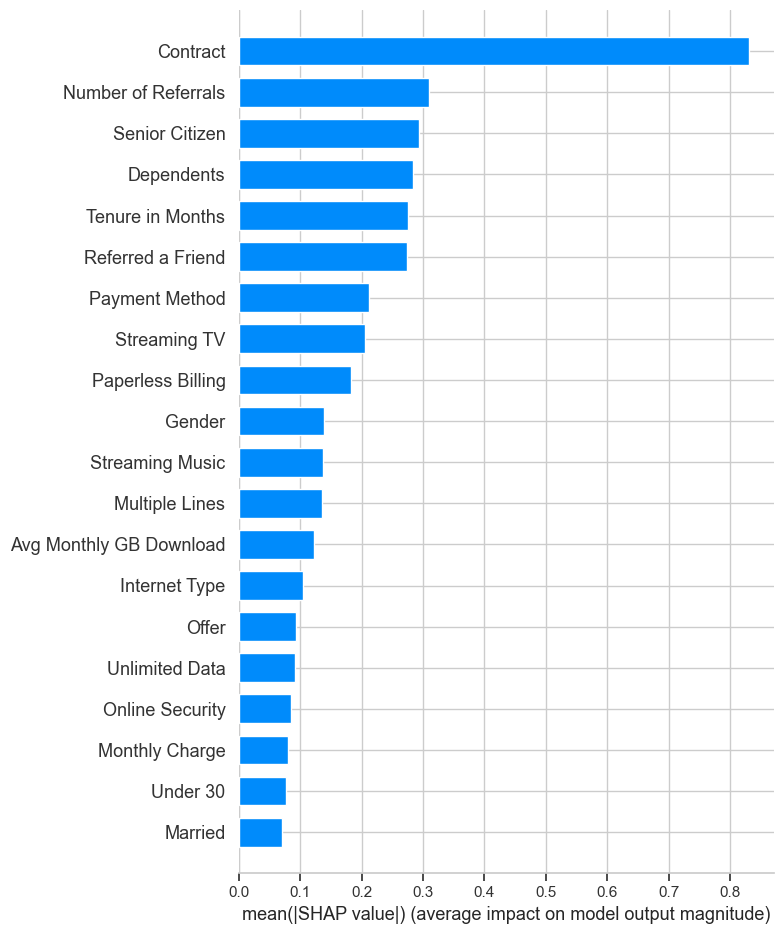


Archivo CSV 'GradientBoostingClassifier_top_5_features_shap_importances.csv' creado con éxito.


In [61]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import shap
import matplotlib.pyplot as plt

# Definir las características (X) y la variable objetivo (y)
X = merged_df.drop('Churn Value', axis=1)
y = merged_df['Churn Value']

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo GBM
gbm = GradientBoostingClassifier(random_state=42)
gbm.fit(X_train, y_train)

# Hacer predicciones
y_pred = gbm.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Imprimir las métricas
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Imprimir el informe de clasificación completo
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Crear un objeto explainer de SHAP
explainer = shap.Explainer(gbm, X_train)

# Calcular los valores SHAP para el conjunto de prueba
shap_values = explainer(X_test)

# Calcular la importancia media de SHAP para cada característica
shap_importances = np.abs(shap_values.values).mean(axis=0)
shap_importances_df = pd.DataFrame({
    'Feature': X.columns,
    'SHAP Importance': shap_importances
})

# Ordenar por importancia descendente y seleccionar las 5 características más importantes
top_5_features = shap_importances_df.sort_values(by='SHAP Importance', ascending=False).head(5)

# Generar el gráfico de importancia de características
shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names=X.columns)

# Mostrar el gráfico
plt.show()

# Guardar las 5 características más importantes en un archivo CSV
csv_filename = 'GradientBoostingClassifier_top_5_features_shap_importances.csv'
top_5_features.to_csv(csv_filename, index=False)

print(f"\nArchivo CSV '{csv_filename}' creado con éxito.")


## árbol de decisión

Accuracy: 0.8473
Precision: 0.8380
Recall: 0.8622
F1 Score: 0.8500

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.83      0.84      1032
           1       0.84      0.86      0.85      1038

    accuracy                           0.85      2070
   macro avg       0.85      0.85      0.85      2070
weighted avg       0.85      0.85      0.85      2070



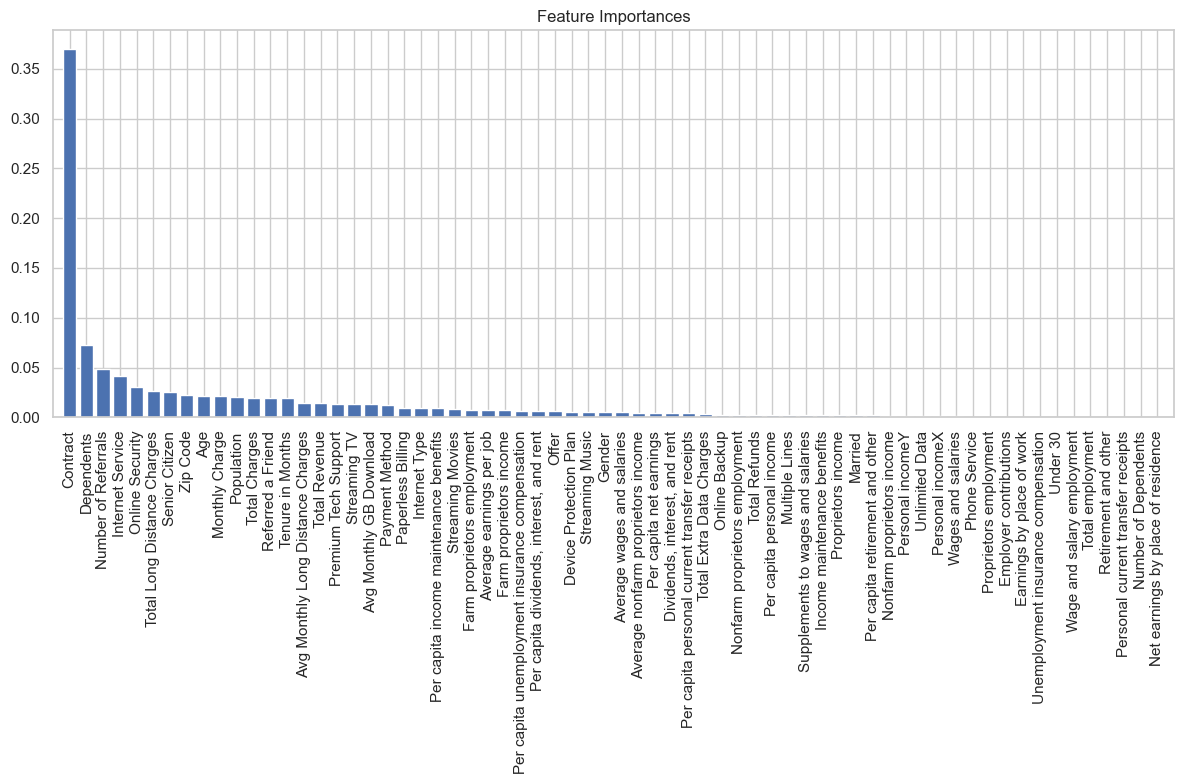


Archivo CSV 'DecisionTree_top_5_features_importances.csv' creado con éxito.


In [62]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt

# Definir las características (X) y la variable objetivo (y)
X = merged_df.drop('Churn Value', axis=1)
y = merged_df['Churn Value']

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo de árbol de decisión
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)

# Hacer predicciones
y_pred = dtc.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Imprimir las métricas
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Imprimir el informe de clasificación completo
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Gráfico de barras de importancia de características
importances = dtc.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 8))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.tight_layout()
plt.show()

# Crear un DataFrame para las importancias de características
importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Ordenar por importancia descendente y seleccionar las 5 características más importantes
top_5_features = importances_df.sort_values(by='Importance', ascending=False).head(5)

# Guardar las 5 características más importantes en un archivo CSV
csv_filename = 'DecisionTree_top_5_features_importances.csv'
top_5_features.to_csv(csv_filename, index=False)

print(f"\nArchivo CSV '{csv_filename}' creado con éxito.")


## Random Forest

Confusion Matrix:
[[949  83]
 [100 938]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1032
           1       0.92      0.90      0.91      1038

    accuracy                           0.91      2070
   macro avg       0.91      0.91      0.91      2070
weighted avg       0.91      0.91      0.91      2070


Accuracy Score:
0.9115942028985508

Top 5 Features:
                Feature  Importance
18             Contract    0.120304
1   Number of Referrals    0.060142
2      Tenure in Months    0.047810
8         Internet Type    0.042113
19    Paperless Billing    0.038630


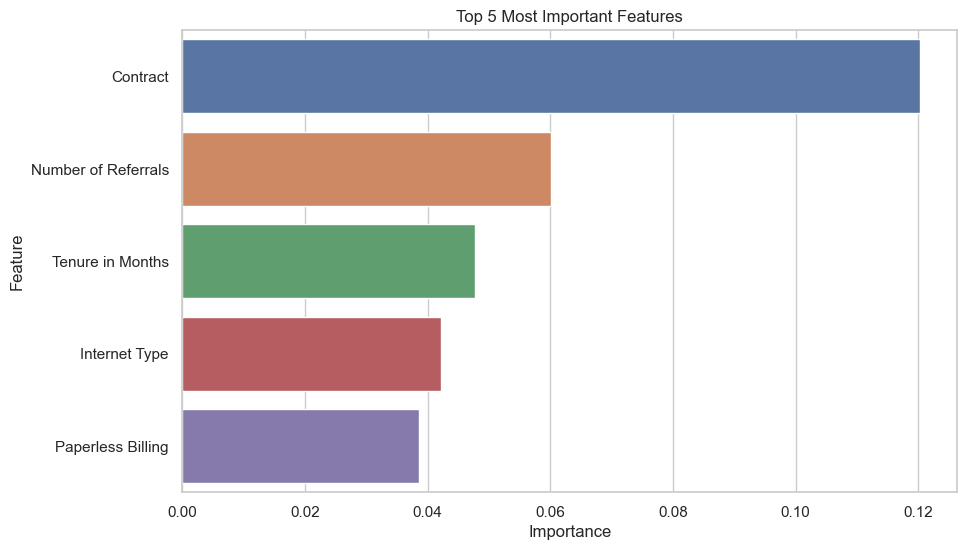


Archivo CSV 'top_5_features_random_forest.csv' creado con éxito.


In [63]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Supongamos que merged_df ya está definido en tu entorno
# Separar las características (X) y la variable objetivo (y)
X = merged_df.drop('Churn Value', axis=1)
y = merged_df['Churn Value']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo de Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

# Obtener la importancia de las características
feature_importances = model.feature_importances_

# Crear un DataFrame para visualizar las importancias de las características
feature_importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Ordenar por importancia descendente y seleccionar las 5 características más importantes
top_5_features = feature_importances_df.sort_values(by='Importance', ascending=False).head(5)

print("\nTop 5 Features:")
print(top_5_features)

# Visualizar las importancias de las características
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_5_features)
plt.title('Top 5 Most Important Features')
plt.show()


# Guardar las características más importantes en un archivo CSV
csv_filename = 'top_5_features_random_forest.csv'
top_5_features.to_csv(csv_filename, index=False)

print(f"\nArchivo CSV '{csv_filename}' creado con éxito.")

## Regresion Logistica

Confusion Matrix:
[[836 196]
 [759 279]]

Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.81      0.64      1032
           1       0.59      0.27      0.37      1038

    accuracy                           0.54      2070
   macro avg       0.56      0.54      0.50      2070
weighted avg       0.56      0.54      0.50      2070


Accuracy Score:
0.538647342995169

Top 5 Features:
                              Feature   Coefficient
65                   Total employment -5.116955e-07
38             Employer contributions  4.771159e-07
62         Wage and salary employment -3.989451e-07
34                           Zip Code -2.965988e-07
49  Supplements to wages and salaries -1.632952e-07


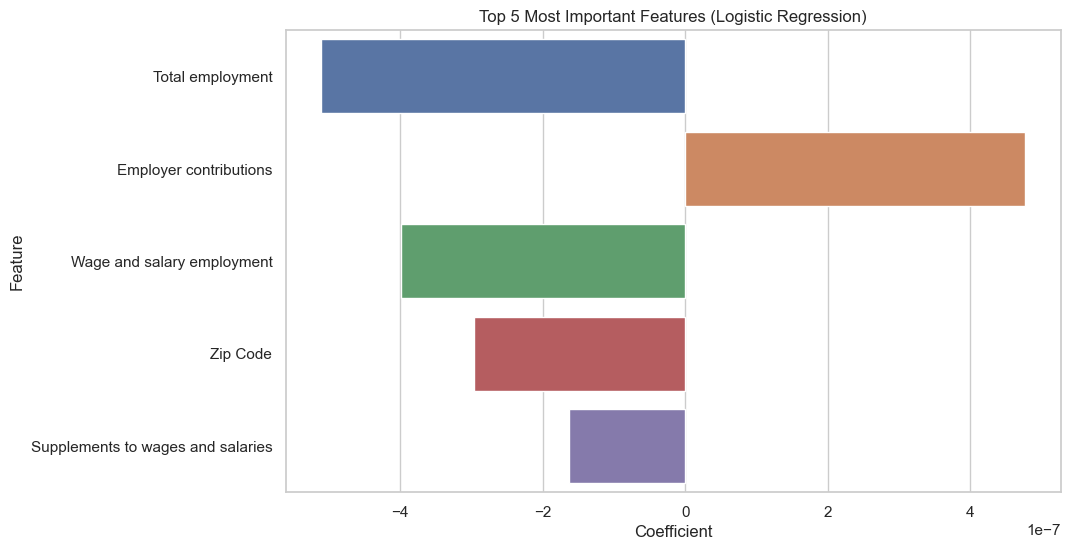

In [64]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


# Separar las características (X) y la variable objetivo (y)
X = merged_df.drop('Churn Value', axis=1)  
y = merged_df['Churn Value']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajustar el modelo de regresión logística
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

# Obtener los coeficientes del modelo
coefficients = model.coef_[0]  # Los coeficientes están en la primera fila del array
feature_names = X.columns

# Crear un DataFrame para visualizar los coeficientes
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Ordenar por el valor absoluto del coeficiente y seleccionar las 5 características más importantes
top_5_features = coef_df.reindex(coef_df['Coefficient'].abs().sort_values(ascending=False).index).head(5)

print("\nTop 5 Features:")
print(top_5_features)

# Visualizar los coeficientes de las características
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=top_5_features)
plt.title('Top 5 Most Important Features (Logistic Regression)')
plt.show()


## SVM

In [65]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Separar las características (X) y la variable objetivo (y)
X = merged_df.drop('Churn Value', axis=1)
y = merged_df['Churn Value']
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Definir los tipos de kernel a evaluar
kernels = ['sigmoid', 'poly', 'rbf']
results = {}

# Entrenar y evaluar el modelo SVM para cada kernel
for kernel in kernels:
    print(f"\nEvaluando kernel: {kernel}")
    model = SVC(kernel=kernel, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Evaluar el modelo
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    accuracy = accuracy_score(y_test, y_pred)
    print("\nAccuracy Score:")
    print(accuracy)
    
    # Almacenar resultados
    results[kernel] = accuracy

    # Obtener las características más importantes para el kernel lineal
    if kernel == 'linear':
        feature_importances = np.abs(model.coef_[0])
        feature_importances_df = pd.DataFrame({
            'Feature': X.columns,
            'Importance': feature_importances
        })
        top_5_features = feature_importances_df.sort_values(by='Importance', ascending=False).head(5)
        print("\nTop 5 Features (Linear Kernel):")
        print(top_5_features)
        
        # Visualizar las importancias de las características
        plt.figure(figsize=(10, 6))
        sns.barplot(x='Importance', y='Feature', data=top_5_features)
        plt.title('Top 5 Most Important Features (Linear Kernel)')
        plt.show()

# Mostrar los resultados de precisión para cada kernel
print("\nAccuracy Scores for Different Kernels:")
for kernel, accuracy in results.items():
    print(f"{kernel}: {accuracy}")



Evaluando kernel: sigmoid
Confusion Matrix:
[[548 484]
 [521 517]]

Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.53      0.52      1032
           1       0.52      0.50      0.51      1038

    accuracy                           0.51      2070
   macro avg       0.51      0.51      0.51      2070
weighted avg       0.51      0.51      0.51      2070


Accuracy Score:
0.5144927536231884

Evaluando kernel: poly
Confusion Matrix:
[[187 845]
 [211 827]]

Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.18      0.26      1032
           1       0.49      0.80      0.61      1038

    accuracy                           0.49      2070
   macro avg       0.48      0.49      0.44      2070
weighted avg       0.48      0.49      0.44      2070


Accuracy Score:
0.48985507246376814

Evaluando kernel: rbf
Confusion Matrix:
[[679 353]
 [634 404]]

Classification Report:
    